# **DATA ANALYTICS ON CORONA VIRUS**

This project is undertook to analyse the effect of corona virus on air quality in INDIA specifically as the data we will be using is belongs to the city of INDIA recorded per day.The data is analysed using kaggle's R notebook which provides power and pre installed R packages.

*Further the data is bifurcated in vehicle pollution and industrial pollution for better understanding the effects of them on air quality*

In [19]:
library(tidyverse)
list.files(path = "../input")

[1] "air-quality-data-in-india"

In [20]:
city <- read.csv("../input/air-quality-data-in-india/city_day.csv")

Here we are reading an csv file which contains **26219** rows and **16** variables . As I said earlier we are going to bifurcate this dataset further in two datasets caled veh_pollution(Pollution caused by vehicles) and indst_pollution(Pollution caused by industries).We will dsitribute the data by knowing the hazardous gas generate by each of them.

Note: Here, Ozone(O3) does not mean Ozone Layer but the harmful gas produced by vehicle and industries both which can cause several breathing problems and Lungs diseases to humans.

Variables we need for veh_pollution Dataset are:
* City 
* Date 
* NO2 - Nitrogen Dioxide
* CO - Carbon Oxide
* Benzene	
* Toluene	
* Xylene
* O3 - Ozone
* AQI_Bucket - Air Quality Index(Indicating: very bad , bad , satisfied , good)

Variables we need for indst_pollution Dataset are:
* City 
* Date 
* NO - Nitrogen Oxide
* CO - Carbon Oxide
* SO2 - Sulfur dioxide
* O3 - Ozone
* AQI_Bucket - Air Quality Index(Indicating: very bad , bad , satisfied , good)


In [21]:
head(city)
dim(city)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Ahmedabad,2015-01-01,NA,NA,0.92,18.22,17.15,NA,0.92,27.64,133.36,0.00,0.02,0.00,NA,
2,Ahmedabad,2015-01-02,NA,NA,0.97,15.69,16.46,NA,0.97,24.55,34.06,3.68,5.50,3.77,NA,
3,Ahmedabad,2015-01-03,NA,NA,17.40,19.30,29.70,NA,17.40,29.07,30.70,6.80,16.40,2.25,NA,
4,Ahmedabad,2015-01-04,NA,NA,1.70,18.48,17.97,NA,1.70,18.59,36.08,4.43,10.14,1.00,NA,
5,Ahmedabad,2015-01-05,NA,NA,22.10,21.42,37.76,NA,22.10,39.33,39.31,7.01,18.89,2.78,NA,
6,Ahmedabad,2015-01-06,NA,NA,45.41,38.48,81.50,NA,45.41,45.76,46.51,5.42,10.83,1.93,NA,


[1] 29531    16

In [22]:
unique(city$AQI_Bucket)
city$AQI_Bucket <- factor(city$AQI_Bucket , levels = c("Poor" , "Very Poor" , "Severe" , "Moderate" , "Satisfactory" , "Good"))

[1]              Poor         Very Poor    Severe       Moderate    
[6] Satisfactory Good        
Levels:  Good Moderate Poor Satisfactory Severe Very Poor

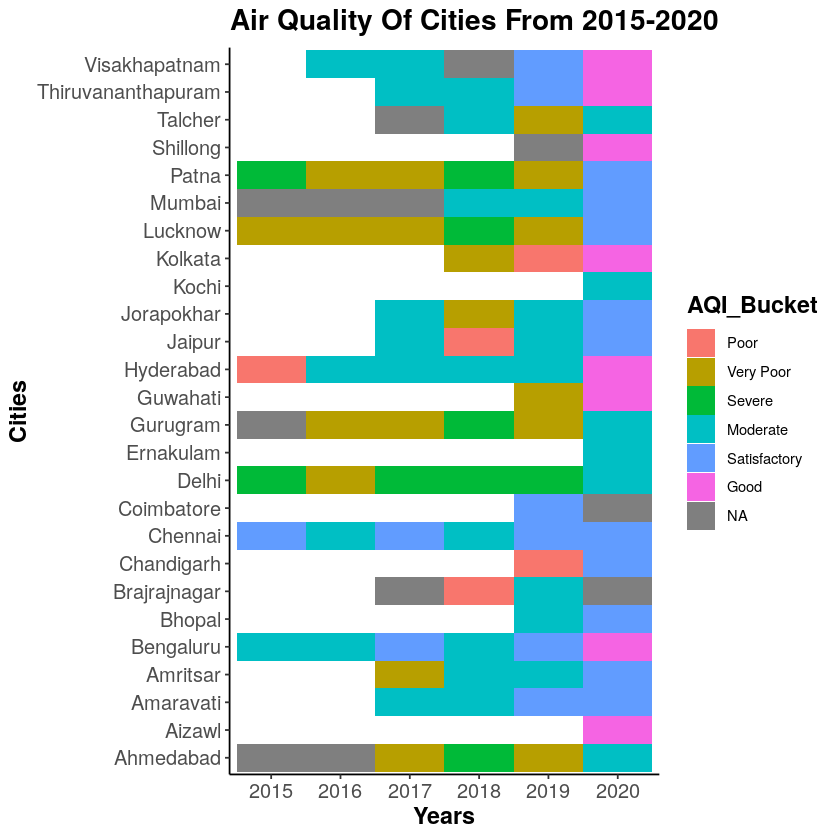

In [23]:
new_data <- city %>%
    separate(Date, sep="-", into = c("Year", "month", "day"))

#visualizing data

ggplot(new_data , aes(x = Year , y= City , fill = AQI_Bucket ))+
geom_tile()+
ggtitle("Air Quality Of Cities From 2015-2020")+
theme_classic()+
theme(
     axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    title = element_text(size=14,face="bold"))+
xlab("Years")+
ylab("Cities")

 **GETTING AND CLEANING DATA FOR VEHICLE AND INDUSTRIAL POLLUTION**

In [24]:
#getting required columns for industrial pollution
indst_pollution <- city%>%
    select(City , Date , NO , CO , SO2 , O3, AQI_Bucket)%>%
    filter(AQI_Bucket == c("Poor" , "Very Poor" , "Severe" , "Moderate" , "Satisfactory" , "Good"))%>%
    group_by(AQI_Bucket)%>%
    arrange(City)
indst_pollution <- na.omit(indst_pollution)
indst_pollution$AQI_Bucket = factor(indst_pollution$AQI_Bucket , levels =  c("Poor" , "Very Poor" , "Severe" , "Moderate" , "Satisfactory" , "Good"))
indst_pollution$Date = as.Date(indst_pollution$Date)
head(indst_pollution)

City,Date,NO,CO,SO2,O3,AQI_Bucket
<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Ahmedabad,2015-02-02,54.56,54.56,55.04,107.38,Severe
Ahmedabad,2015-02-12,14.19,14.19,65.91,31.88,Poor
Ahmedabad,2015-02-14,37.49,37.49,99.72,36.47,Severe
Ahmedabad,2015-02-20,33.84,33.84,101.53,40.98,Severe
Ahmedabad,2015-03-14,6.42,6.42,67.53,34.94,Poor
Ahmedabad,2015-03-22,25.38,25.38,75.80,46.68,Severe


In [25]:
#getting required columns for vehicle pollution
veh_pollution <- city%>%
    select(City , Date ,NO2 , CO , Benzene , Toluene , Xylene , O3 , AQI_Bucket)%>%
    filter(AQI_Bucket == c("Poor" , "Very Poor" , "Severe" , "Moderate" , "Satisfactory" , "Good"))%>%
    group_by(AQI_Bucket)%>%
    arrange(City)
veh_pollution <- na.omit(veh_pollution)
veh_pollution$AQI_Bucket = factor(veh_pollution$AQI_Bucket , levels =  c("Poor" , "Very Poor" , "Severe" , "Moderate" , "Satisfactory" , "Good"))
veh_pollution$Date = as.Date(veh_pollution$Date)
head(veh_pollution)


City,Date,NO2,CO,Benzene,Toluene,Xylene,O3,AQI_Bucket
<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Ahmedabad,2015-02-02,35.31,54.56,0.46,0.06,35.61,107.38,Severe
Ahmedabad,2015-02-12,30.10,14.19,7.72,17.46,2.51,31.88,Poor
Ahmedabad,2015-02-14,47.58,37.49,17.00,52.66,6.98,36.47,Severe
Ahmedabad,2015-02-20,36.14,33.84,20.12,43.51,7.48,40.98,Severe
Ahmedabad,2015-03-14,25.03,6.42,8.24,21.47,3.09,34.94,Poor
Ahmedabad,2015-03-22,39.34,25.38,15.78,48.41,7.07,46.68,Severe


**Here, we have our data for vehicle pollution for different cities per day.
now lets analyze different variables correlation with O3 i.e. we going to look how far different gases affects ozone.**

In [26]:
veh_year <- veh_pollution %>%
    separate(Date, sep="-", into = c("Year", "month", "day"))%>%
    group_by(Year)%>%
    summarize(
              NO2 = sum(NO2),
              CO= sum(CO),
              Benzene= sum(Benzene),
              Toluene= sum(Toluene),
              Xylene= sum(Xylene),
              Ozone= sum(O3))
veh_year

Year,NO2,CO,Benzene,Toluene,Xylene,Ozone
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,3374.64,843.33,390.71,1231.45,310.76,4098.69
2016,3893.07,374.27,243.32,536.73,289.96,4055.29
2017,6113.50,552.66,488.41,1484.06,670.67,7123.43
2018,16651.42,2295.01,1545.20,6774.16,1942.80,14702.05
2019,17919.95,1880.75,2105.60,7743.67,1690.28,16740.51
2020,6745.86,436.69,999.04,2865.74,558.23,9953.02


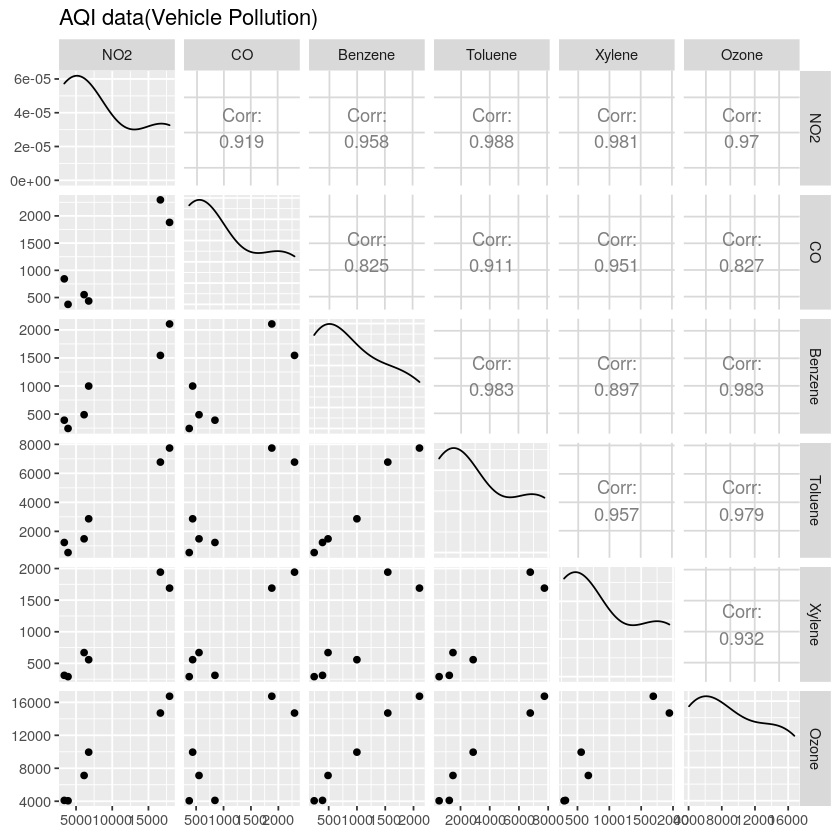

In [27]:
library(GGally)
ggpairs(data=veh_year, columns=2:7, title="AQI data(Vehicle Pollution)")

**From above we can see the relationship between different gases , i.e. the more the correlation value is close to 1 the more they are relate to eachother**

**As we can see here the gases which effects *ozone* the most are as follows:**
1. Nitrogen Dioxide
2. Toluene	
3. Xylene



> In India first corona case is recorded in year 2020 and hence, I created another Two Dataset for Pre And Post Corona Pandemic.
>For Pre Corona, I  have Subset the dataset which is inbetween Dates "2015-01-01" and "2019-12-31
>**AND** also 
>For Post Corona, I  have Subset the dataset which is after "2020-01-01"

In [28]:
#PRE AND POST CORONA EFFECT ON INDUSTRIAL POLLUTION 
indst_pollution_pre <- subset(indst_pollution,
                           Date >= "2015-01-01" & Date <= "2019-12-31")
indst_pollution_post <- subset(indst_pollution,
                            Date >= "2020-01-01")

In [29]:
#PRE AND POST CORONA EFFECT ON VEHICLE POLLUTION 
veh_pollution_pre <- subset(veh_pollution,
                           Date >= "2015-01-01" & Date <= "2019-12-31")
veh_pollution_post <- subset(veh_pollution,
                            Date >= "2020-01-01")

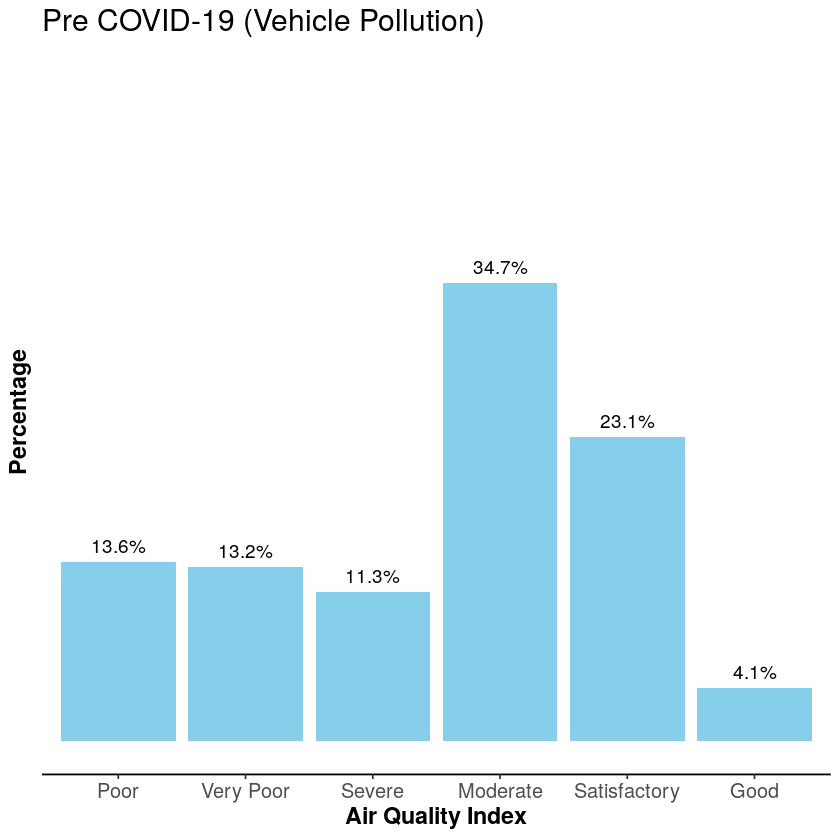

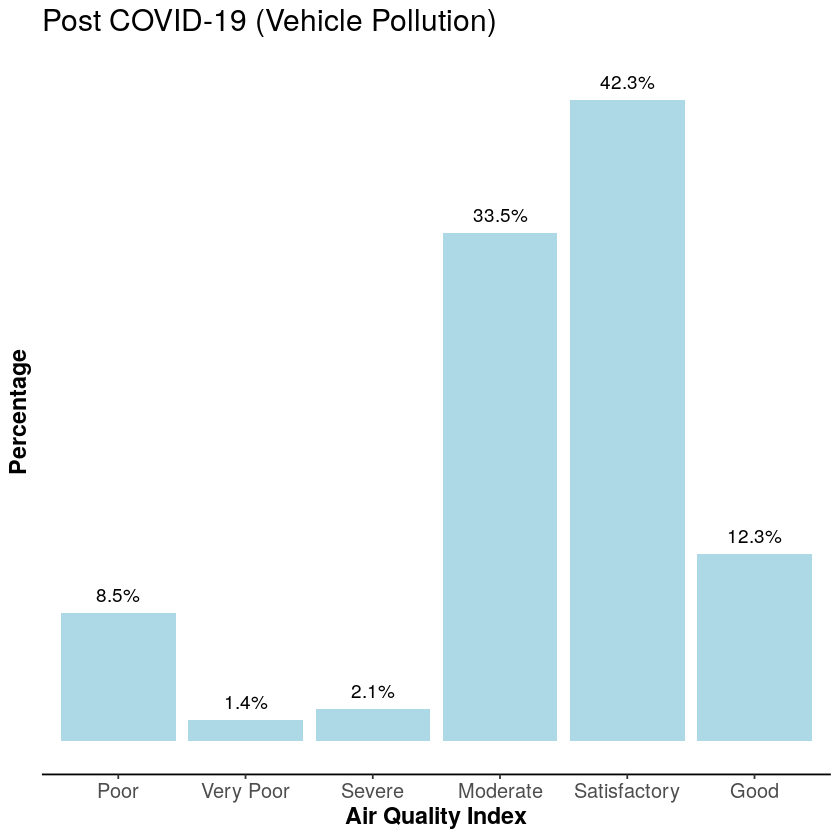

In [30]:
veh_pre_percentage = veh_pollution_pre %>% group_by(AQI_Bucket) %>%
  summarise(count=n()) %>%
  mutate(Percentage=count/sum(count)) 

veh_post_percentage = veh_pollution_post %>% group_by(AQI_Bucket) %>%
  summarise(count=n()) %>%
  mutate(Percentage=count/sum(count))

#visualizing data
ggplot(veh_pre_percentage , aes(x=AQI_Bucket , y=Percentage ))+
geom_bar(fill = "skyblue " , stat="identity")+
ggtitle("Pre COVID-19 (Vehicle Pollution)")+
theme_classic()+
theme(legend.position = "None",
     axis.text.x=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
     title = element_text(size = 15),
     axis.ticks.y = element_blank(),
     axis.text.y = element_blank(),
     axis.line.y = element_blank())+
xlab("Air Quality Index")+
scale_y_continuous(limits=c(0,0.5)) + 
  geom_text(data=veh_pre_percentage, aes(label=paste0(round(Percentage*100,1),"%"),
                               y=Percentage+0.012), size=4)


ggplot(veh_post_percentage , aes(AQI_Bucket , y=Percentage ))+
geom_bar(fill = "lightblue", stat="identity")+
ggtitle("Post COVID-19 (Vehicle Pollution)")+
theme_classic()+
theme(legend.position = "None",
     axis.text.x=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
     title = element_text(size = 15),
     axis.ticks.y = element_blank(),
     axis.text.y = element_blank(),
     axis.line.y = element_blank())+
xlab("Air Quality Index")+ 
  geom_text(data=veh_post_percentage, aes(label=paste0(round(Percentage*100,1),"%"),
                               y=Percentage+0.012), size=4)



**From above we can see Pre And Post Corona Effect on air pollution by vehicles. Their is drastic decrease in severe, poor and very poor air quality index of cities whereas their is increase in satisfactory and good air quality index**

Now we will analyse gases increment over the years by **industrial pollution**

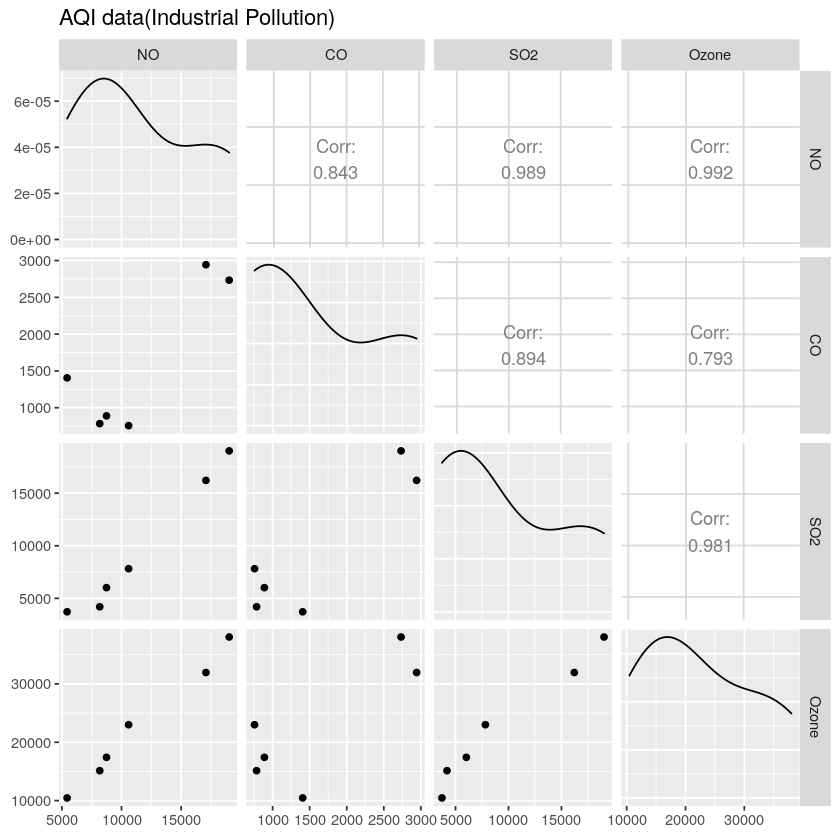

In [31]:
indst_year <- indst_pollution %>%
    separate(Date, sep="-", into = c("Year", "month", "day"))%>%
    group_by(Year)%>%
    summarize(
              NO = sum(NO),
              CO= sum(CO),
              SO2= sum(SO2),
              Ozone= sum(O3))
ggpairs(data=indst_year, columns=2:5, title="AQI data(Industrial Pollution)")

From above we can see which variable of gas is highly correlated with which gas that is produced by industries

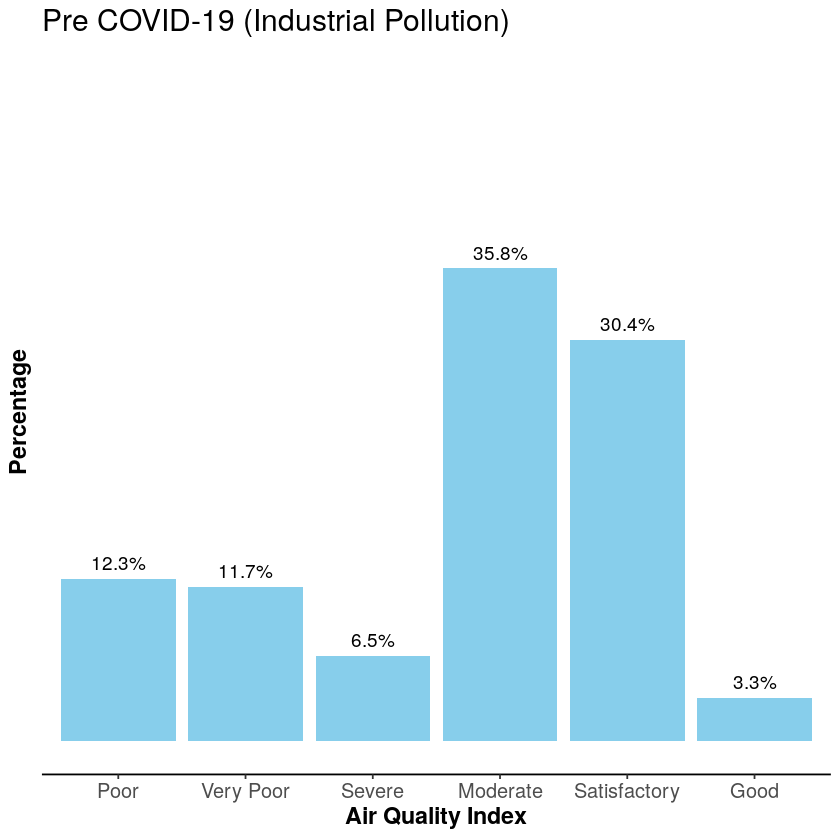

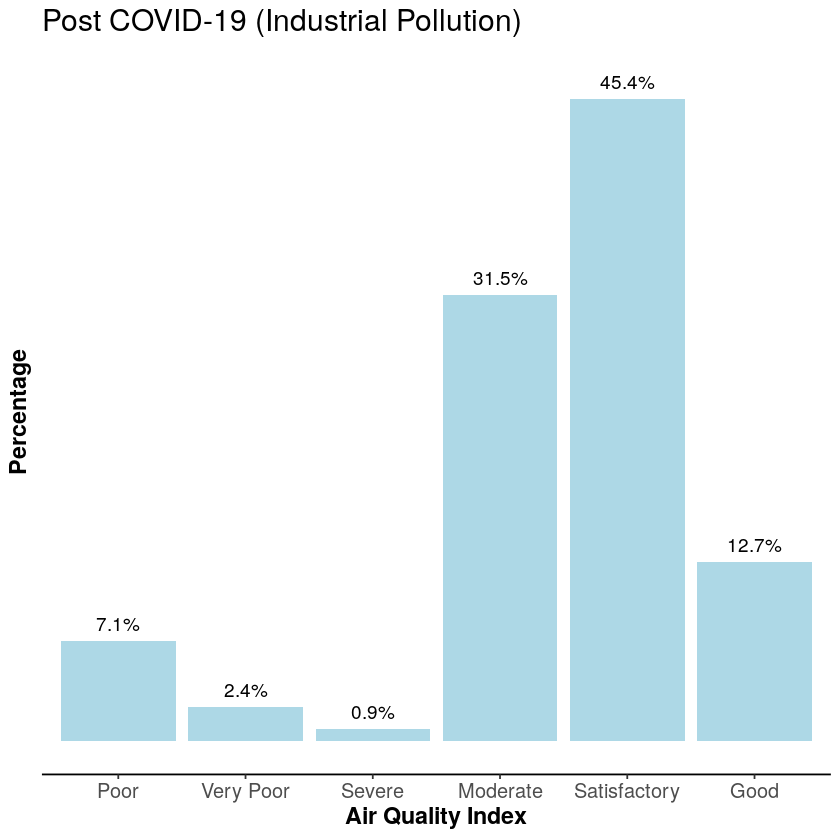

In [32]:
indst_pre_percentage = indst_pollution_pre %>% group_by(AQI_Bucket) %>%
  summarise(count=n()) %>%
  mutate(Percentage=count/sum(count)) 

indst_post_percentage = indst_pollution_post %>% group_by(AQI_Bucket) %>%
  summarise(count=n()) %>%
  mutate(Percentage=count/sum(count))

#visualizing data
ggplot(indst_pre_percentage , aes(x=AQI_Bucket , y=Percentage ))+
geom_bar(fill = "skyblue " , stat="identity")+
ggtitle("Pre COVID-19 (Industrial Pollution)")+
theme_classic()+
theme(legend.position = "None",
     axis.text.x=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
     title = element_text(size = 15),
     axis.ticks.y = element_blank(),
     axis.text.y = element_blank(),
     axis.line.y = element_blank())+
xlab("Air Quality Index")+
scale_y_continuous(limits=c(0,0.5)) + 
  geom_text(data=indst_pre_percentage, aes(label=paste0(round(Percentage*100,1),"%"),
                               y=Percentage+0.012), size=4)


ggplot(indst_post_percentage , aes(AQI_Bucket , y=Percentage ))+
geom_bar(fill = "lightblue", stat="identity")+
ggtitle("Post COVID-19 (Industrial Pollution)")+
theme_classic()+
theme(legend.position = "None",
     axis.text.x=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
     title = element_text(size = 15),
     axis.ticks.y = element_blank(),
     axis.text.y = element_blank(),
     axis.line.y = element_blank())+
xlab("Air Quality Index")+ 
  geom_text(data=indst_post_percentage, aes(label=paste0(round(Percentage*100,1),"%"),
                               y=Percentage+0.012), size=4)


> Above Bar Chart shows the that their is drastic fall in air pollution caused by industries which leads to the increment AIR QUALITY INDEX towards satisfactory and good

# **SUMMARY**

> Corona virus is affeecting peoples life-style in many ways.Many countries including india have suggested people to quarantine themselves and also lockdown entire countries that means not a single person is allowed to go out,If one wished to go out he/she must follow the guide lines that are given by the government of india. 
* Here,I analysed the air quality data of india for post and pre corona effects on air pollution created by vehicles and industries,And I reached to the conclusion that this pandemic is having a good effect on air pollution.
* Since the industries are mostly closed and most of them trying to adopt environment of work from home , which can be a reason we see their is continuous downfall in pollution levels of the cities.
* Another cause of air pollution is through vehicles, which is also seems to be decreasing as most of the people self quaratined themselves in their houses in order to not get infected by this virus.Another reason would be that most of the people is ignoring to travel long distance and moving out of their houses just to buy essential stuff they need.